# Probabilistic ML (Naive Bayes)

## Probabilty 

* Random Experiment 
* Sample Space 
* Event 
* Probability of event

**Example** 

|Random Experiment | Coin Tossing  
|------------------|------------|
|Sample Space       | {Head, Tail}|
|Event            | Head|
|Probabilty of Event | $\frac{1}{2}$|


**Where**

$$P(S) = 1$$
$$0 \leq P(A) \leq 1$$

$S$ is the sample space, $A$ is an event in the space. 

### Relationship Between events 

for two events $A$ and $B$

* $A \cap B = \phi \rightarrow$  **Matually execlusive events (Did not occurs together Example death and life, night and day, ... etc)** $ \rightarrow P(A \cap B) = 0$ 
![](images/MutExc.png)


*  $A \cap B \neq \phi $ 
    1. $A$ and $B$ independet $ \rightarrow P(A \cap B) = P(A) P(B)$ **Ex: Selection with replacement** 
    2. $A$ and $B$ dependant $\rightarrow P(A \cap B) = P(A|B) P(B)$ **Ex: Selection without replacement** 

![](images/venn_intersect.png)

## Conditional Probability 


* Additional Information (Prior knowledge)
* Outcome space reduction
* Relative probabilities

![](images/statistics-Conditional-Probability.png)


$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$




## Bayes Rule

$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$
$$P(A\cap B) = P(B\cap A) = P(B|A)P(A)$$

So 

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$


## Naive Bayes Classifier

### Data 

|Y|X1|...|Xn|
|--|--|--|--|
|1|13|...|93|
|2|33|...|81|
|1|14|...|74|
|.|.|...|.|
|.|.|...|.|
|1|63|...|24|

$$P(Y|X1, X2, ... , Xn) = \frac{P(X1, X2, ... , Xn|Y) P(Y)}{P(X1, X2, ... , Xn)}$$

### First Assumption 

$$P(Y|X1, X2, ... , Xn) \propto P(X1, X2, ... , Xn|Y) P(Y)$$

### Second Assumption (Independence)

$$P(Y|X1, X2, ... , Xn) \propto P(X1|Y)P(X2|Y) ... P(Xn|Y) P(Y)$$

So 

$$P(Y|X1, X2, ... , Xn) \propto \Pi_i P(Xi|Y) P(Y)$$

### Multinomial Naive Bayes Model 

$$P(Y|X1, X2, ... , Xn) =  P(Y) \Pi_i pi^{Xi} $$

Using log 

$$log(P(Y|X1, X2, ... , Xn)) =  log(P(Y)) +  {Xi} \sum_i log(pi) $$

$$\hat{Y}_{m\times 1} = A_{m\times 1} + B_{m\times n} X_{n \times 1}$$


Where $m$ is the number of classes, and $n$ is the number of features 

## Simple Implementation

In [29]:
import numpy as np 
import pandas as pd 

x = np.array([[24, 2],
              [21, 23], 
              [23, 21],
             [19, 5]])
y = [1, 2, 2, 1]


In [30]:
from collections import Counter
class_counts = Counter(y)
print(class_counts)
A = np.log([class_counts[1]/len(y), class_counts[2]/ len(y)])
A

Counter({1: 2, 2: 2})


array([-0.69314718, -0.69314718])

In [31]:
y_vect = pd.get_dummies(y)
y_vect

,1,2
0,1,0
1,0,1
2,0,1
3,1,0


In [32]:
# Count of each feature given differnet classes
features_counts = np.dot(y_vect.T, x)
features_counts

array([[43,  7],
       [44, 44]])

In [33]:
# Calculate features given Probabilities 
features_probs = (features_counts.T/features_counts.sum(axis=1)).T
print("Features Given Probs : \n ", features_probs)
B = np.log(features_probs)
B

Features Given Probs : 
  [[0.86 0.14]
 [0.5  0.5 ]]


array([[-0.15082289, -1.96611286],
       [-0.69314718, -0.69314718]])

In [34]:
new_point = [23, 2]
log_probs  = A + B.dot(new_point) 
probs = np.power(np.e, log_probs)
probs = probs/probs.sum()
probs

array([9.99951190e-01, 4.88099609e-05])

### Lets use sklearn and compare

In [36]:
from sklearn.naive_bayes import MultinomialNB
a = MultinomialNB(alpha=1e-10)
a.fit(x, y)

MultinomialNB(alpha=1e-10, class_prior=None, fit_prior=True)

In [37]:
a.__dict__

{'alpha': 1e-10,
 'fit_prior': True,
 'class_prior': None,
 'classes_': array([1, 2]),
 'class_count_': array([2., 2.]),
 'feature_count_': array([[43.,  7.],
        [44., 44.]]),
 'feature_log_prob_': array([[-0.15082289, -1.96611286],
        [-0.69314718, -0.69314718]]),
 'class_log_prior_': array([-0.69314718, -0.69314718])}

# Skin Classifier

https://archive.ics.uci.edu/ml/datasets/skin+segmentation

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv('data/Skin_NonSkin.txt', names=['B', 'G', 'R', 'Class'], sep = '\t')
df['IsSkin'] = df['Class'].apply(lambda x : True if x == 1 else False)
df = df[['R', 'G', 'B', 'Class', 'IsSkin']]
df

,R,G,B,Class,IsSkin
0,123,85,74,1,True
1,122,84,73,1,True
2,121,83,72,1,True
3,119,81,70,1,True
4,119,81,70,1,True
...,...,...,...,...,...
245052,112,162,163,2,False
245053,112,162,163,2,False
245054,112,162,163,2,False
245055,112,162,163,2,False


In [10]:
def show_pixel(pixel):
    img = np.zeros((10, 10, 3)).astype(np.uint8)
    img[...] = pixel
    plt.imshow(img)
    plt.show()

Skin =  True


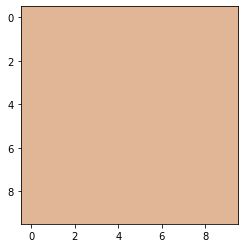

In [11]:
# Show a skin sample
print("Skin = ", df.iloc[254].to_list()[-1])
show_pixel(df.iloc[254].to_list()[:3]) 

Skin =  False


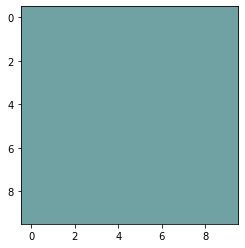

In [12]:
# Show a none skin sample
print("Skin = ", df.iloc[245054].to_list()[-1])
show_pixel(df.iloc[245054].to_list()[:3]) 

In [13]:
from sklearn.naive_bayes import MultinomialNB
skin_classifeir = MultinomialNB()
skin_classifeir.fit(df[['R', 'G', 'B']], df['Class'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
skin_classifeir.__dict__
skin_classifeir.predict_proba

<bound method BaseNB.predict_proba of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>

In [15]:
def run_classifier(classifier, pixel, get_probs = False):
    classifier_input = np.array(pixel).reshape(-1, 1).T
    if get_probs:
        res = classifier.predict_proba(classifier_input)
    else:
        res = classifier.predict(classifier_input)
    
    return res

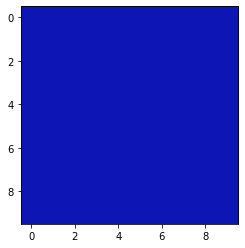

array([False])

In [16]:
# Lets test it 
pix = [13, 21, 180]
show_pixel(pix)
run_classifier(skin_classifeir,pix) == 1

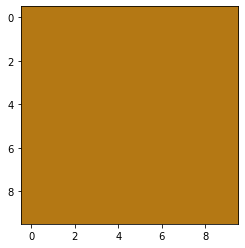

array([ True])

In [17]:
pix = [180, 120, 20]
show_pixel(pix)
run_classifier(skin_classifeir,pix) == 1

## Real Images

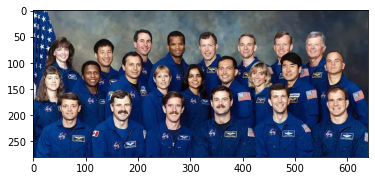

In [18]:
# Run it with a real image
img = plt.imread('images/faces.jpg')
plt.imshow(img)

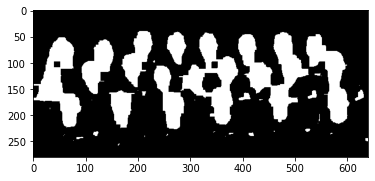

In [19]:
import cv2
pixels = img.reshape((img.shape[0]*img.shape[1], 3))
out = skin_classifeir.predict(pixels)
skin_mask = out.reshape((img.shape[0], img.shape[1]))
skin_mask = (skin_mask == 1).astype(np.uint8)
# Fill in gaps
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, np.ones((11,11),np.uint8))
plt.set_cmap('gray')
plt.imshow(skin_mask)

In [20]:
skin_mask = np.stack([skin_mask ] * 3, axis=-1)
skin_mask.shape

(280, 640, 3)

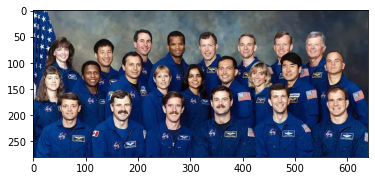

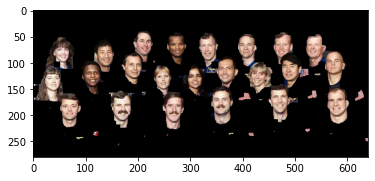

In [21]:
plt.imshow(img)
plt.show()
plt.imshow(skin_mask * img)

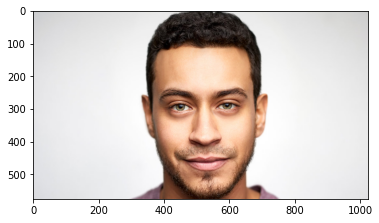

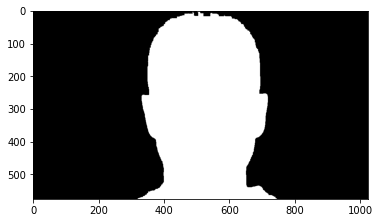

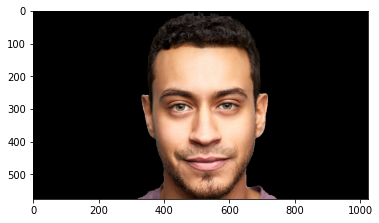

In [22]:
# Another Image

img = plt.imread('images/face.jpg')
plt.imshow(img)
plt.show()
pixels = img.reshape((img.shape[0]*img.shape[1], 3))
out = skin_classifeir.predict(pixels)
skin_mask = out.reshape((img.shape[0], img.shape[1]))
skin_mask = (skin_mask == 1).astype(np.uint8)
# Fill in gaps
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, np.ones((11,11),np.uint8))
plt.set_cmap('gray')
plt.imshow(skin_mask)
plt.show()
skin_mask = np.stack([skin_mask ] * 3, axis=-1)
plt.imshow(skin_mask * img)
plt.show()

# Thanks